# Image classification with fastai

In this workshop we will learn to build state of the art models for classification really fast with [fastai](https://www.fast.ai/). The structure of the workshop will be the follwing:



1.   Load and explore data
2.   Train the model
3.   Evaluate results

In [ ]:
from fastai.vision.all import *
import warnings
warnings.filterwarnings("ignore")

## Single label classification

### Binary classification

In [ ]:
# Download data
path = untar_data(URLs.PETS)

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [ ]:
files = get_image_files(path/"images")
len(files)

7390

In [ ]:
files[0],files[3]

(Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_87.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_103.jpg'))

In [ ]:
def label_func(file_name): return file_name[0].isupper()

In [ ]:
# Load data
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))# el modelo que voy a usar estan entrenados con esa resolución 224

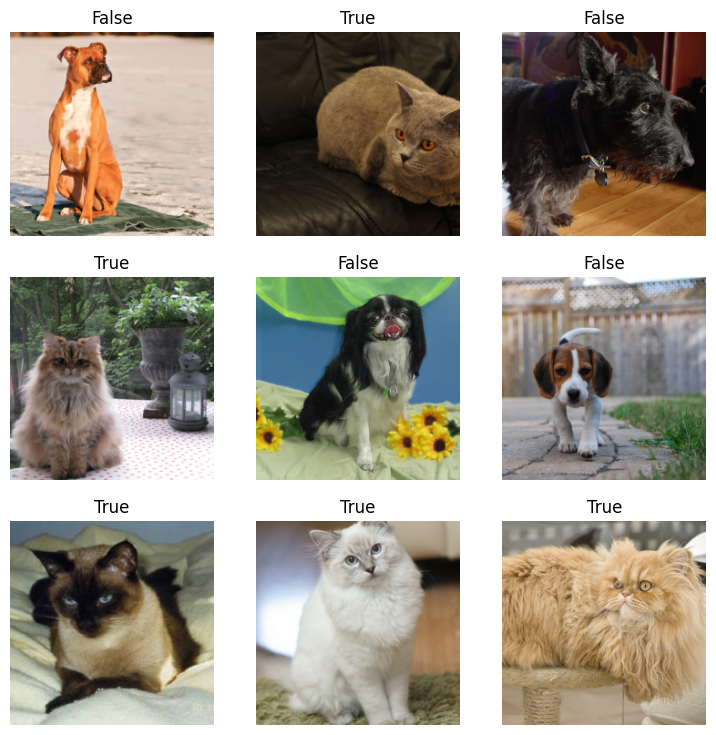

In [ ]:
# Show batch of data
dls.show_batch()

In [ ]:
# Initialize model
learn = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 107MB/s]


In [ ]:
# Train model
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.156521,0.018106,0.006766,31:42


epoch,train_loss,valid_loss,error_rate,time
0,0.042605,0.014661,0.005413,45:13


In [ ]:
#para guardar


In [ ]:
# Predict one sample
learn.predict(files[0])

('True', tensor(1), tensor([3.9556e-09, 1.0000e+00]))

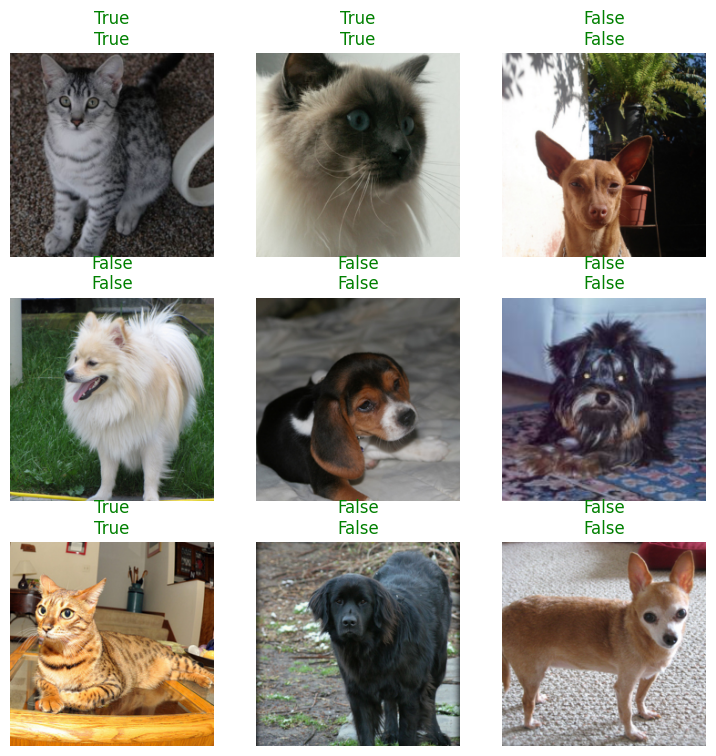

In [ ]:
# Show a batch of predictions
learn.show_results()

### Multi class classification

In [ ]:
files[0].name

'Egyptian_Mau_87.jpg'

In [ ]:
def label_func(file_name): return ('_').join(file_name.split('_')[:-1])

In [ ]:
label_func(files[0].name)

'Egyptian_Mau'

In [ ]:
# Load data
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

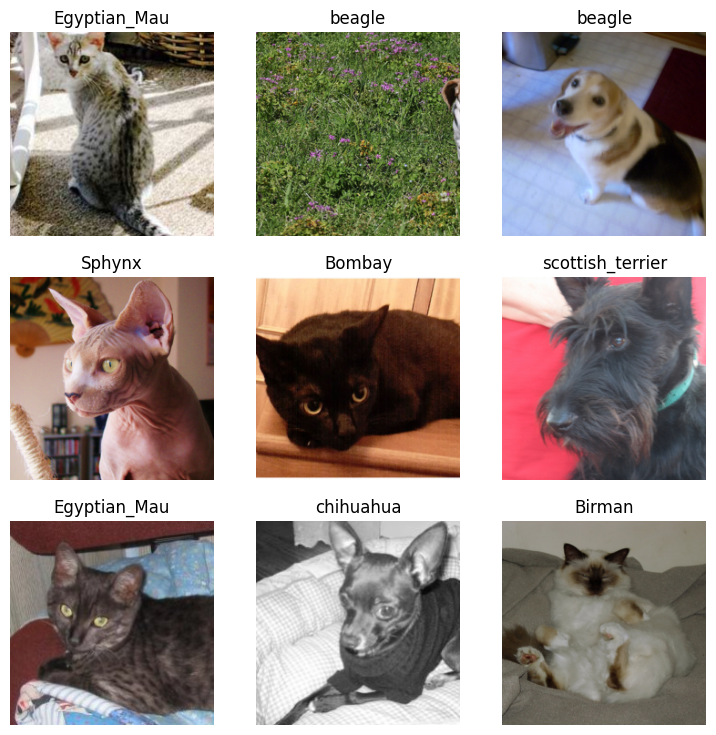

In [ ]:
# Show batch
dls.show_batch()

In [ ]:
# Load data with data augmentation
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224)) # en el item_tfms se cambia el tamaño de las imagenes porque no todos tienen el mismo tamaño. el batchi_tfms sirve para hacer un data aumentation y ponerlas al tamaño 224

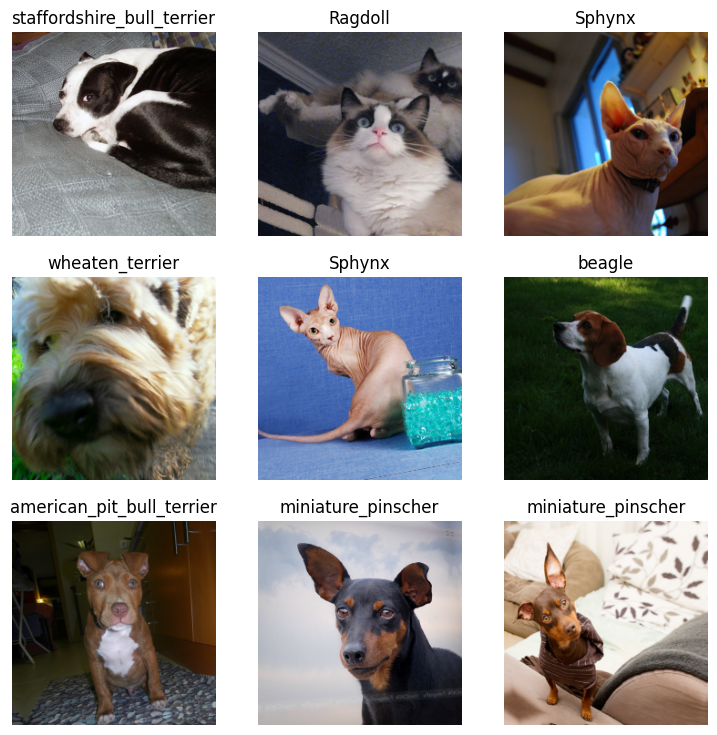

In [ ]:
# Show batch
dls.show_batch()

In [ ]:
# Initialize model
learn = vision_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(valley=0.0008317637839354575)

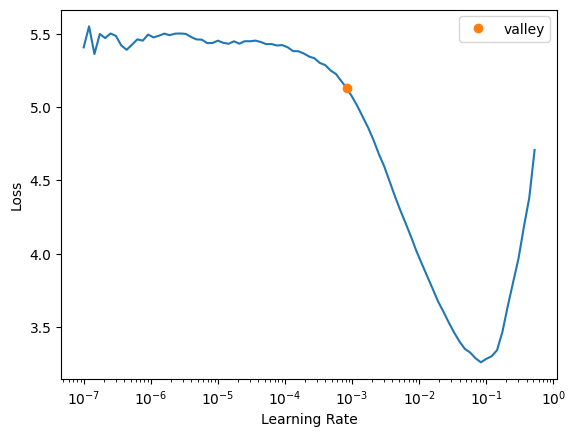

In [ ]:
# Find LR
learn.lr_find()#nos permite encontrar un lr optimo para nuestro modelo

In [ ]:
# Train model
learn.fine_tune(2, 5e-3)

In [ ]:
# Show a batch of predictions
learn.show_results()

In [ ]:
# Show worst classified images
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

In [ ]:
# Show confusion matrix
classification_interp = ClassificationInterpretation.from_learner(learn)
classification_interp.plot_confusion_matrix(figsize=(15,15), dpi=60)

In [ ]:
# Show most confused classes
classification_interp.most_confused(min_val=2)

## Multi-label classification

una imagen tenga multiples etiquetas

In [ ]:
# Download data
path = untar_data(URLs.PASCAL_2007)
path.ls()

In [ ]:
df = pd.read_csv(path/'train.csv')
df.head()

In [ ]:
# Load data
dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

In [ ]:
# Show batch
dls.show_batch()

In [ ]:
# Initialize learn with F1 score for multi-label problems as metric
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name = 'F1(macro)'
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'F1(samples)'
learn = vision_learner(dls, resnet50, metrics=[f1_macro, f1_samples])

In [ ]:
learn.save('yael')

In [ ]:
learn.lr_find()

In [ ]:
# Train the model
learn.fine_tune(5, 3e-2)

In [ ]:
# Show worst classified samples
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

## Exercise 1: Train a DenseNet201 resizing images to 224x224 in the data augmentation phase

In [ ]:
# Load data


In [ ]:
# Show batch


In [ ]:
# Initialize learner


In [ ]:
# Find learning rate


In [ ]:
# Train the model


In [ ]:
# Show worst classified samples


In [ ]:
# Find learning rate


In [ ]:
# Train the model
